# Scrapeando Chocolate!

Después de comer barras de chocolate toda tu vida, has decidido ir en busca de la mejor barra de chocolate del mundo.

Usted ha encontrado un sitio web que tiene más de 1700 comentarios de barras de chocolate de todo el mundo. Los datos se muestran en esta web: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

Los datos se muestran en una tabla, en lugar de un csv. Afortunadamente, tenemos el poder de BeautifulSoup que nos ayudará a transformar esta página web en un DataFrame que podemos manipular y analizar.

La escala de calificación es del 1 al 5, como se describe en esta guía de reviews (http://flavorsofcacao.com/review_guide.html). A1 es "desagradable" el chocolate, mientras que 5 es una barra que trasciende "más allá de los límites ordinarios".

Algunas de las preguntas en las que pensamos cuando encontramos este conjunto de datos fueron: ¿Dónde se cultivan los mejores granos de cacao? ¿Qué países producen las barras de mayor calificación? ¿Cuál es la relación entre el porcentaje de sólidos de cacao y la clasificación?

¿Podemos encontrar una manera de responder a estas preguntas, o descubrir más preguntas, usando BeautifulSoup y Pandas?

### Haga sopa de chocolate!

1. Explore la página web que aparece aqui: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html . ¿Qué elementos podrían ser útiles para escrapear aquí? ¿Qué elementos no queremos escrapear?

Si desea utilizar su navegador para inspeccionar el sitio web, es posible que necesite refrescar el concepto en devTools: https://developers.google.com/web/tools/chrome-devtools

2. Hagamos una petición a este sitio para obtener el HTML en bruto, que luego podemos convertir en un objeto BeautifulSoup.

La URL es: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

Puede pasar esto al método `.get()` del modulo `requests` para obtener el HTML.

In [6]:
import requests

In [7]:
url = "https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html"
website = requests.request("get", url)

In [10]:
content = website.content

3. Cree un objeto BeautifulSoup llamado `soup` a través de este HTML.
Utilice `"html.parser"` como el analizador, y el contenido de la respuesta que obtuvo de su solicitud como el documento.

In [9]:
from bs4 import BeautifulSoup

In [12]:
soup = BeautifulSoup(content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
        

4. Si lo desea, imprima el objeto `soup` para explorar el HTML.
¡Cuánta cantidad de filas! Probablemente esté muy aliviado de que no tengamos que scrapear esta información a mano.

### ¿Cómo se distribuyen las calificaciones?

5. ¿Cuántas barras de chocolate terribles hay ahí fuera? ¿Y cuántos se ganaron un 5 perfecto? Hagamos un histograma de estos datos.

Lo primero que hay que hacer es poner todas las clasificaciones en una lista.
Utilice un comando en el objeto `soup` para obtener todas las etiquetas que contienen las clasificaciones.

In [95]:
soup_ratings = soup.find_all(attrs={"class": "Rating"})

## otra forma: soup.select(".Rating")


6. Cree una lista vacía llamada `ratings` para guardar todos los rating alli.

7. Recorra las etiquetas de clasificación y obtenga el texto contenido en cada una de ellas. Añádelo a la lista de `ratings`.

Al hacer esto, convierta la clasificación en un `float`, de modo que la lista de clasificaciones sea numérica. Esto debería ayudar con los cálculos más adelante.

In [96]:
ratings = []

for elem in soup_ratings:
    if elem.text != "Rating":
        ratings.append(float(elem.text))
    
ratings


##otra forma: con un slice
## for elem in soup_ratings[1:]:
        ##ladilada...

[3.75,
 2.75,
 3.0,
 3.5,
 3.5,
 2.75,
 3.5,
 3.5,
 3.75,
 4.0,
 2.75,
 3.0,
 3.25,
 3.75,
 2.75,
 3.0,
 3.25,
 4.0,
 3.25,
 3.5,
 4.0,
 3.5,
 3.75,
 3.75,
 3.75,
 2.75,
 3.25,
 3.5,
 3.5,
 2.75,
 3.0,
 3.0,
 3.75,
 2.75,
 2.75,
 2.75,
 2.75,
 3.0,
 2.5,
 2.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.75,
 3.0,
 2.5,
 2.5,
 2.75,
 2.5,
 3.0,
 3.25,
 3.0,
 3.25,
 4.0,
 3.75,
 4.0,
 3.0,
 3.0,
 2.75,
 3.5,
 3.0,
 3.75,
 3.0,
 2.75,
 2.75,
 3.0,
 3.25,
 3.5,
 3.0,
 3.25,
 3.25,
 3.25,
 3.25,
 3.5,
 3.75,
 4.0,
 4.0,
 5.0,
 3.0,
 3.0,
 3.5,
 3.75,
 4.0,
 3.5,
 3.5,
 5.0,
 4.0,
 3.25,
 2.75,
 3.75,
 3.75,
 4.0,
 3.0,
 3.5,
 3.0,
 2.5,
 2.75,
 3.0,
 3.5,
 3.75,
 3.5,
 3.25,
 3.25,
 3.5,
 3.75,
 3.5,
 4.0,
 4.0,
 3.75,
 3.25,
 3.25,
 3.5,
 3.5,
 3.75,
 3.5,
 3.75,
 4.0,
 2.75,
 3.25,
 3.5,
 3.25,
 3.75,
 4.0,
 2.75,
 1.75,
 3.75,
 3.25,
 3.25,
 3.5,
 2.5,
 2.75,
 1.75,
 3.0,
 3.0,
 3.25,
 3.75,
 2.75,
 3.75,
 3.75,
 3.75,
 3.75,
 2.5,
 3.0,
 3.25,
 3.5,
 3.0,
 2.5,
 2.5,
 2.75,
 3.5,
 3.5,
 4.0,
 3.25,
 3.5

8. Utilizando Matplotlib, cree un histograma de los valores de los ratings:

(array([  4.,   0.,  10.,   3.,   0.,  32.,  14., 127., 259.,   0., 341.,
        303., 392., 210.,   0.,  98.,   0.,   0.,   0.,   2.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

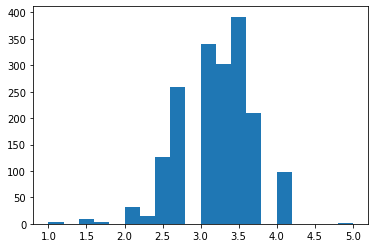

In [94]:
import matplotlib.pyplot as plt

plt.hist(ratings, bins=20)

### ¿Qué chocolatero hace el mejor chocolate?

9. Ahora queremos encontrar a los 10 chocolateros más valorados. Una forma de hacerlo es hacer un DataFrame que tenga las empresas chocolateras en una columna y los ratings en otra. Entonces, podemos hacer un grupo para encontrar a los que tengan la puntuación media más alta.

Primero, busquemos todas las etiquetas en la página web que contienen los nombres de las empresas.

In [51]:
soup_companies = soup.find_all(attrs={"class": "CompanyLocation"})


10. Al igual que hicimos con los ratings, ahora queremos hacer una lista vacía para guardar los nombres de las empresas. Llamela `company`

In [82]:
company = []

for elem in soup_companies:
    company.append(elem.text)
    
company.pop(0)

11. Recorra las etiquetas que contienen nombres de empresas y añada el texto de cada etiqueta a la lista que acaba de crear.

In [83]:
for elem in soup_companies:
    company.append(elem.text)
    
company.pop(0)

'Company\n               Location\n            '

In [61]:
#En el ultimo punto, vamos a crear un dataframe con las dos listas resultantes: ratings  y companies_names

In [84]:
import pandas as pd
company

['France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'U.S.A.',
 'U.S.A.',
 'Fiji',
 'Fiji',
 'Fiji',
 'Fiji',
 'Ecuador',
 'Ecuador',
 'Mexico',
 'Switzerland',
 'Switzerland',
 'Switzerland',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Peru',
 'Peru',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Brazil',
 'Brazil',
 '

In [86]:
pd.DataFrame(ratings,company)

,0
France,3.75
France,2.75
France,3.00
France,3.50
France,3.50
...,...
Austria,3.75
Austria,3.00
Austria,3.50
Austria,3.25


In [98]:
##otra forma mejor

pd.DataFrame({
    "companies": company,
    "ratings": ratings
})

,companies,ratings
0,France,3.75
1,France,2.75
2,France,3.00
3,France,3.50
4,France,3.50
...,...,...
1790,Austria,3.75
1791,Austria,3.00
1792,Austria,3.50
1793,Austria,3.25
